In [1]:
import dive as dive
import pymc as pm
import deerlab as dl
import numpy as np
%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.14.0-de is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
with pm.Model() as model: 
    mu = pm.Normal("mu", mu = 0, sigma = 1)
    obs = pm.Normal("obs", mu=mu, sigma=1, observed=np.random.rand(100))


model.basic_RVs
type(model)

NameError: name 'pm' is not defined

In [2]:
def preprocess(file_name):
    (t, idx), V = dl.deerload(file_name)
    V = dl.correctphase(V)
    V = V[:,V.sum(axis=0) != 0][:,:-1].sum(axis=1)
    t = dl.correctzerotime(V, t)
    
    return V, t

In [4]:
t = np.linspace(-0.1,5,300)

r = np.linspace(2,15,400)           # distance axis, nm
param = [5,0.2,0.4,5.4,0.15,0.6] # parameters for single-Gaussian model
P = dl.dd_gauss2(r,param)          # model distance distribution
lam = 0.4                       # modulation depth
B = dl.bg_hom3d(t,0.2,lam)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)  # kernel matrix

Vexp = K@P + dl.whitegaussnoise(t,0.01,seed=0)
def generatedata(Vexp):
    return t, Vexp, r, P,K


t, Vexp, r, P,K= generatedata(Vexp)

t1 = t
V1 = Vexp
r1 = r
P1 = P




In [13]:
pars = {"method": 'regularization', "r": np.linspace(2,7,100)}

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, "cores": 4}
NUTSpars = {"target_accept":0.95}

podel,Model = dive.model(t1, V1, pars)

#trace,model =  dive.sample(Model, MCMCparameters,  NUTSpars=NUTSpars,seed=True, seeds=[1,2,3,4])
trace,model =  dive.sample(podel, MCMCparameters,  NUTSpars=NUTSpars)

/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pymc/distributions/continuous.py:364: FutureWarning: The `testval` argument is deprecated; use `initval`.
  return super().__new__(cls, *args, **kwargs)


9.84419676283724e-05
Time-domain data:    300 points from -0.1 µs to 5 µs
Distance vector:     100 points from 2 nm to 7 nm
Model:              regularization


DisconnectedInputError:  
Backtrace when that variable is created:

  File "/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/k2/9dh2fqs54tl01b6hl8yjsj6c0000gn/T/ipykernel_34431/1907091193.py", line 6, in <cell line: 6>
    podel,Model = dive.model(t1, V1, pars)
  File "/Users/lukas.z/Desktop/Research/dive/dive/models.py", line 68, in model
    model_pymc = regularizationmodel(t, Vexp, K0, r, delta_prior=delta_prior, tau_prior=tau_prior, tauGibbs=tauGibbs, deltaGibbs=deltaGibbs)
  File "/Users/lukas.z/Desktop/Research/dive/dive/models.py", line 232, in regularizationmodel
    delta = pm.Flat('delta', shape=(), dtype='float64', initval=1.0)
  File "/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pymc/distributions/continuous.py", line 364, in __new__
    return super().__new__(cls, *args, **kwargs)
  File "/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pymc/distributions/distribution.py", line 271, in __new__
    rv_out = model.register_rv(
  File "/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pymc/model.py", line 1297, in register_rv
    self.create_value_var(rv_var, transform)
  File "/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pymc/model.py", line 1447, in create_value_var
    value_var = rv_var.type()


In [14]:
Model


       P ~ Flat()
    lamb ~ Beta(1.3, 2)
       k ~ Gamma(0.5, f())
      V0 ~ N(1, 0.2)
     tau ~ Flat()
   delta ~ Flat()
   sigma ~ Deterministic(f(tau))
lg_alpha ~ Deterministic(f(tau, delta))
       V ~ N(f(V0, k, P, lamb), f(tau))

In [31]:
dir(podel['model'].lamb)


['T',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array_priority__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__count__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__dot__',
 '__eq__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__rdivmod__',
 '__rdot__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_test_value__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__weakref__',


In [10]:
fit = dive.interpret(trace,model)






AttributeError: 'dict' object has no attribute 'basic_RVs'

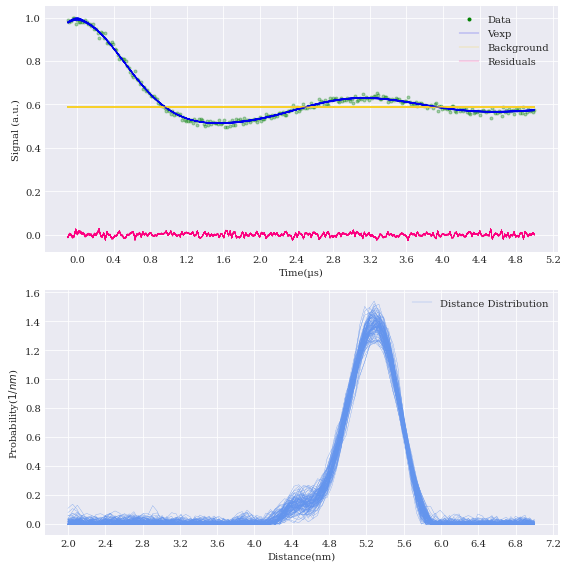

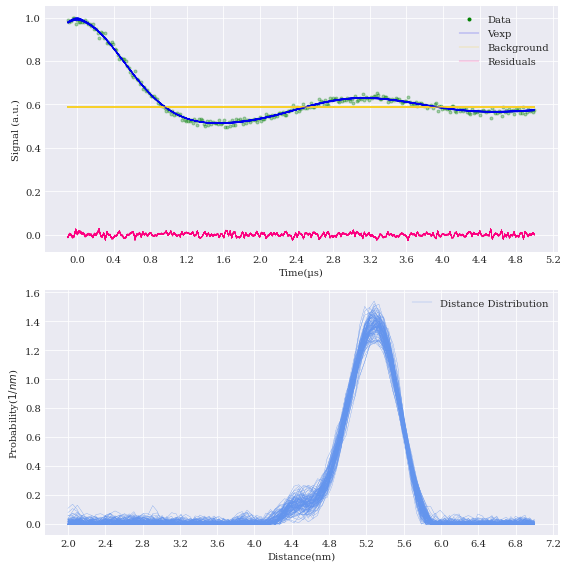

In [26]:
fit.plot(style = 'noodle')

In [17]:
with Model['model']

In [35]:
keys

[]

In [9]:
tis

{}

In [6]:
import pymc as pm
with pm.Model() as model:
    testval  = np.zeros(len(r))
    Q = pm.Flat('P', shape=len(r), dtype='float64',testval=testval)



/opt/anaconda3/envs/pymc/lib/python3.10/site-packages/pymc/distributions/continuous.py:364: FutureWarning: The `testval` argument is deprecated; use `initval`.
  return super().__new__(cls, *args, **kwargs)


In [8]:
dir(Q)

['T',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array_priority__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__count__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__dot__',
 '__eq__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__rdivmod__',
 '__rdot__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_test_value__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__weakref__',


In [11]:
import aesara
aesara.tensor.TensorVariable

aesara.tensor.var.TensorVariable

In [18]:
type(trace)

pymc3.backends.base.MultiTrace

In [23]:

p

['K',
 'P',
 'V0',
 'V0_lowerbound__',
 'Vexp',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'delta',
 'dr',
 'k',
 'k_log__',
 'lamb',
 'lamb_logodds__',
 'lg_alpha',
 'plot',
 'r',
 'sigma',
 'subsample_fits',
 'summary',
 't',
 'tau',
 'trace',
 'varnames']